In [ ]:
2024년 12월 24일 성탄절 이브 버전

# Global Configurations

# Initialization

In [1]:
#######################
# HOME_DIR 경로 설정  #
#######################
# HOME_DIR = '/home/swlab/work/NNV/data/' # 'D:/Work/Research/AI/wireless/' # 'M:/Archive/Google Drive/'   
HOME_DIR = 'D:/Work/Research/AI/wireless/' # 'M:/Archive/Google Drive/'   


SOURCE_CODE_DIR = HOME_DIR + '' # 'Archive/Source Codes/Jupyter/Antenna Selection Exp02/'

####################################################
# Pickle 폴더에 별도 제공된 피클 데이터 파일 복사  #
####################################################
DB_DIR = SOURCE_CODE_DIR + 'Pickle/' # 'C:\Digital Data\Data/'

LOG_DIR = SOURCE_CODE_DIR + 'Logs/'
MODEL_DIR = SOURCE_CODE_DIR + 'Models/'
WEIGHT_DIR = SOURCE_CODE_DIR + 'Weights/'
HISTORY_DIR = SOURCE_CODE_DIR + 'History/'

PYTORCHMODEL_DIR = SOURCE_CODE_DIR + 'PytorchModels/'

DATA_USING = 'H'
LABEL_TYPE = 'hard'
CASE_TYPE = 'short'
INPUT_SHAPE = 'HTH-1D'

ADDITIONAL_STRING = ' mMIMO FC ' + DATA_USING + ' ' + LABEL_TYPE + ' ' + CASE_TYPE

##### Set of Experiments (ONLY for FULLY-CONNECTED NETWORK)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import pickle
import os
import datetime
import time

# Data Loading


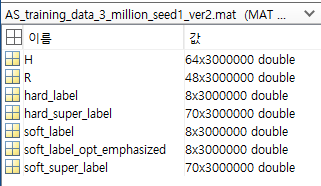

## Load Input File from pickle

## Assign Train and Test Data

In [3]:
file_name_head = "mMIMO_AS_training_data_20000_80_"
file_name_tail = ".pickle"

pickle_H_HTH_ORG_1D = file_name_head + "H_HTH_ORG_1D" + file_name_tail
pickle_labelVal = file_name_head + "labelVal" + file_name_tail
pickle_labelVal01 = file_name_head + "labelVal01" + file_name_tail

pickle_dir_data = DB_DIR + pickle_H_HTH_ORG_1D
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    H_inputVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal01
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal01_all = pickle.load(f)

D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_H_HTH_ORG_1D.pickle
D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_labelVal.pickle
D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_labelVal01.pickle


In [4]:
numberOfAntenna = 16

no_dataInFile = 20000

############# Training DATA

no_testDataFiles = 78
no_totalData = no_dataInFile * (no_testDataFiles)

if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    inputVal = R_inputVal_all[:no_totalData,:]
elif DATA_USING == 'H':
    inputSize = numberOfAntenna * numberOfAntenna
    inputVal = H_inputVal_all[:no_totalData,:]

labelVal = labelVal_all[:no_totalData,:]
labelVal01 = labelVal01_all[:no_totalData,:]

############# Test DATA

no_valDataFiles = 2
no_totalValData = no_dataInFile * no_valDataFiles


if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    testInputVal = R_inputVal_all[no_totalData:,:]
elif DATA_USING == 'H':
    inputSize = numberOfAntenna * numberOfAntenna
    testInputVal = H_inputVal_all[no_totalData:,:]

if INPUT_SHAPE == 'H-ARI-1D':
    inputSize = 384
    
testLabelVal = labelVal_all[no_totalData:,:]
testLabelVal01 = labelVal01_all[no_totalData:,:]

In [5]:
print(no_totalData)
print(no_totalValData)

if DATA_USING == 'R':
    print(R_inputVal_all.shape)
elif DATA_USING == 'H':
    print(H_inputVal_all.shape)
print(labelVal_all.shape)
print(labelVal01_all.shape)

print('====== INPUT(' + DATA_USING + ') : ' + str(inputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== LABEL : ' + str(labelVal.shape))
print(labelVal)
print('====== LABEL01 : ' + str(labelVal01.shape))
print(labelVal01)

print('================================================')

print('====== TEST INPUT(' + DATA_USING + ') : ' + str(testInputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== TEST LABEL : ' + str(testLabelVal.shape))
print(testLabelVal)
print('====== TEST LABEL01 : ' + str(testLabelVal01.shape))
print(testLabelVal01)

1560000
40000
(1600000, 256)
(1600000, 16)
(1600000, 16)
====== INPUT(H) : (1560000, 256) 256
[[0.43508627 0.23848953 0.17430991 ... 0.1494573  0.30463561 0.75840547]
 [0.91201586 0.14239275 0.35888622 ... 0.19680358 0.33829332 0.82588916]
 [0.38958044 0.19529653 0.12486362 ... 0.25814239 0.1255808  0.33462105]
 ...
 [0.2864378  0.2310919  0.14119503 ... 0.06365318 0.0519114  0.33934222]
 [0.92569351 0.22256976 0.21577545 ... 0.28583585 0.17893457 0.73793588]
 [0.57095904 0.11634311 0.03737261 ... 0.03271034 0.02874345 0.48409718]]
====== LABEL : (1560000, 16)
[[0.04384313 0.05183032 0.07402939 ... 0.07402939 0.05051586 0.07402939]
 [0.04217359 0.02302756 0.0729369  ... 0.07109003 0.0729369  0.0729369 ]
 [0.06612287 0.07401018 0.05073263 ... 0.07401018 0.07401018 0.02408138]
 ...
 [0.0699337  0.04693798 0.06201793 ... 0.0699337  0.0699337  0.04982493]
 [0.08032117 0.08032117 0.08032117 ... 0.08032117 0.04618059 0.08032117]
 [0.07990972 0.02283044 0.07990972 ... 0.07990972 0.02191744 0.

In [9]:
print(testInputVal[0])

[0.31350801 0.03122154 0.12374129 0.06969103 0.05844533 0.09580197
 0.13856065 0.17613624 0.06533396 0.09261105 0.13794354 0.18024963
 0.21314345 0.14448313 0.15817774 0.13151406 0.03122154 0.49541526
 0.11446397 0.20494661 0.08587708 0.06044053 0.29908038 0.14883607
 0.07967834 0.11004131 0.23879917 0.09701059 0.2481148  0.31140614
 0.15232968 0.1424488  0.12374129 0.11446397 0.52050733 0.21870406
 0.19074699 0.25736801 0.28751545 0.13637225 0.13514442 0.32608125
 0.1578043  0.14946092 0.19894206 0.2175457  0.17903613 0.19311328
 0.06969103 0.20494661 0.21870406 0.75934434 0.1232774  0.08341776
 0.19424309 0.17642629 0.19231025 0.24309572 0.21696543 0.01315657
 0.41971273 0.34656936 0.21559764 0.04899319 0.05844533 0.08587708
 0.19074699 0.1232774  0.28838356 0.18813567 0.11754869 0.07147498
 0.15798612 0.11402313 0.03337453 0.13680158 0.04789532 0.08959748
 0.11781388 0.14320601 0.09580197 0.06044053 0.25736801 0.08341776
 0.18813567 0.4370984  0.0964449  0.10689753 0.25195522 0.2525

In [6]:
!pip install torch

## Prepare for Data and Metrics 

## Model Setting

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

class WirelessModel (nn.Module):
    def __init__(self, numberOfAntenna):
        super(WirelessModel, self).__init__()

        # layer 1
        self.layer1 = nn.Linear(numberOfAntenna*numberOfAntenna, 491, bias=False)    # numberOfAntenna*numberOfAntenna = 256
        self.bn1 = nn.BatchNorm1d(491)

        # layer 2
        self.layer2 = nn.Linear(491, 491, bias=False)
        self.bn2 = nn.BatchNorm1d(491)

        # layer 3
        self.layer3 = nn.Linear(491, numberOfAntenna, bias=False)     # numberOfAntenna = 16
        self.bn3 = nn.BatchNorm1d(numberOfAntenna)

        nn.init.kaiming_normal_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.layer3.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        # layer 1
        x = self.layer1(x)
        x = self.bn1(x)
        x = F.relu(x)

        # layer 2
        x = self.layer2(x)
        x = self.bn2(x)
        x = F.relu(x)

        # layer 3
        x = self.layer3(x)
        x = self.bn3(x)
        x = torch.sigmoid(x)

        return x

wirelessModel = WirelessModel(16)

wirelessModel.to(device)
print(wirelessModel)

cpu
WirelessModel(
  (layer1): Linear(in_features=256, out_features=491, bias=False)
  (bn1): BatchNorm1d(491, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=491, out_features=491, bias=False)
  (bn2): BatchNorm1d(491, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer3): Linear(in_features=491, out_features=16, bias=False)
  (bn3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [8]:
!pip install torchsummary

from torchsummary import summary
summary(wirelessModel, (numberOfAntenna * numberOfAntenna,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 491]         125,696
       BatchNorm1d-2                  [-1, 491]             982
            Linear-3                  [-1, 491]         241,081
       BatchNorm1d-4                  [-1, 491]             982
            Linear-5                   [-1, 16]           7,856
       BatchNorm1d-6                   [-1, 16]              32
Total params: 376,629
Trainable params: 376,629
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.44
Estimated Total Size (MB): 1.45
----------------------------------------------------------------


In [9]:
# 
train_X_all = torch.tensor(inputVal, dtype=torch.float32)
train_Y_all = torch.tensor(labelVal, dtype=torch.float32)
train_Y_01_all = torch.tensor(labelVal01, dtype=torch.float32)

test_X_all = torch.tensor(testInputVal, dtype=torch.float32)
test_Y_all = torch.tensor(testLabelVal, dtype=torch.float32)
test_Y_01_all = torch.tensor(testLabelVal01, dtype=torch.float32)

# for indenendent validation
from sklearn.model_selection import train_test_split

train_X = train_X_all
train_Y = train_Y_01_all

test_X = test_X_all
test_Y = test_Y_01_all

print('Train : Test = ' + str(train_X.shape[0]) + ' : ' + str(test_X.shape[0]))

Train : Test = 1560000 : 40000


In [17]:
print(test_X[0])

tensor([0.3135, 0.0312, 0.1237, 0.0697, 0.0584, 0.0958, 0.1386, 0.1761, 0.0653,
        0.0926, 0.1379, 0.1802, 0.2131, 0.1445, 0.1582, 0.1315, 0.0312, 0.4954,
        0.1145, 0.2049, 0.0859, 0.0604, 0.2991, 0.1488, 0.0797, 0.1100, 0.2388,
        0.0970, 0.2481, 0.3114, 0.1523, 0.1424, 0.1237, 0.1145, 0.5205, 0.2187,
        0.1907, 0.2574, 0.2875, 0.1364, 0.1351, 0.3261, 0.1578, 0.1495, 0.1989,
        0.2175, 0.1790, 0.1931, 0.0697, 0.2049, 0.2187, 0.7593, 0.1233, 0.0834,
        0.1942, 0.1764, 0.1923, 0.2431, 0.2170, 0.0132, 0.4197, 0.3466, 0.2156,
        0.0490, 0.0584, 0.0859, 0.1907, 0.1233, 0.2884, 0.1881, 0.1175, 0.0715,
        0.1580, 0.1140, 0.0334, 0.1368, 0.0479, 0.0896, 0.1178, 0.1432, 0.0958,
        0.0604, 0.2574, 0.0834, 0.1881, 0.4371, 0.0964, 0.1069, 0.2520, 0.2525,
        0.0525, 0.0969, 0.1274, 0.2761, 0.1822, 0.1812, 0.1386, 0.2991, 0.2875,
        0.1942, 0.1175, 0.0964, 0.7052, 0.1115, 0.0919, 0.3309, 0.2054, 0.3563,
        0.1553, 0.2626, 0.2292, 0.2170, 

## Learning Fully-Connected

### Learning

In [11]:
# after setting train_X_all, train_Y_all, and so on

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import LambdaLR
from sklearn.metrics import accuracy_score, precision_score

train_dataset = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

test_dataset = TensorDataset(test_X, test_Y)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

def piecewise_scheduler_fn(epoch):
    if epoch < 10:
        return 0.005
    elif epoch < 15:
        return 0.0005
    elif epoch < 20:
        return 0.00005
    else:
        return 0.000005

criterion = nn.BCELoss()
optimizer = optim.Adam(wirelessModel.parameters(), lr=0.01)
scheduler = LambdaLR(optimizer, lr_lambda=piecewise_scheduler_fn)

# 훈련
num_epochs = 25
history = {'loss': [], 'accuracy': [], 'precision': []}

for epoch in range(num_epochs):
    wirelessModel.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = wirelessModel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    scheduler.step()
    history['loss'].append(running_loss / len(train_loader))
    
    # 검증
    wirelessModel.eval()
    all_preds = []
    all_preds_raw = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = wirelessModel(inputs)
            #preds = outputs.round()
            preds = torch.round(outputs)
            all_preds.append(preds)
            all_preds_raw.append(outputs)
            all_labels.append(labels)
    
    all_preds = torch.cat(all_preds)
    all_preds_raw = torch.cat(all_preds_raw)
    all_labels = torch.cat(all_labels)
    test_acc = accuracy_score(all_labels, all_preds)
    test_precision = precision_score(all_labels, all_preds, average='macro') # 평균 옵션은 필요에 따라 조정
    
    history['accuracy'].append(test_acc)
    history['precision'].append(test_precision)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {test_acc}, Precision: {test_precision}")

# 최종 평가
wirelessModel.eval()
all_preds = []
all_preds_raw = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = wirelessModel(inputs)
        # preds = outputs.round()
        preds = torch.round(outputs)
        all_preds.append(preds)
        all_preds_raw.append(outputs)
        all_labels.append(labels)

all_preds = torch.cat(all_preds)
all_preds_raw = torch.cat(all_preds_raw)
all_labels = torch.cat(all_labels)
test_loss = criterion(all_preds, all_labels).item()
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro')

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")


Epoch 1/25, Loss: 0.4626565806567669, Accuracy: 0.016725, Precision: 0.773238104684129
Epoch 2/25, Loss: 0.4608637047883792, Accuracy: 0.017075, Precision: 0.7738923816139526
Epoch 3/25, Loss: 0.45941568550008993, Accuracy: 0.017275, Precision: 0.774408679344455
Epoch 4/25, Loss: 0.45822325729024715, Accuracy: 0.01705, Precision: 0.7750358458862912
Epoch 5/25, Loss: 0.45720059655797785, Accuracy: 0.01725, Precision: 0.7754476614317878
Epoch 6/25, Loss: 0.45629968547668215, Accuracy: 0.01745, Precision: 0.7758834762607447
Epoch 7/25, Loss: 0.4554977907966345, Accuracy: 0.01705, Precision: 0.7764579744675545
Epoch 8/25, Loss: 0.4547603972065143, Accuracy: 0.017325, Precision: 0.7764098171172877
Epoch 9/25, Loss: 0.4540860298352364, Accuracy: 0.017025, Precision: 0.7767835947507646
Epoch 10/25, Loss: 0.4534698839371021, Accuracy: 0.0175, Precision: 0.7769128835789676
Epoch 11/25, Loss: 0.4525575139583686, Accuracy: 0.017625, Precision: 0.7771560578618
Epoch 12/25, Loss: 0.4524348025711683

In [14]:
torch.save(wirelessModel.state_dict(), PYTORCHMODEL_DIR + 'wirelessmodel.pt')

In [1]:
######################################
# auto_LiRPA를 git으로 1회 내려받기  #
######################################

!git clone https://github.com/Verified-Intelligence/auto_LiRPA




Cloning into 'auto_LiRPA'...


In [15]:
#########################################################
# auto_LiRPA/setup.py 인코딩 문제를 해결하기 위해 편집  #
#########################################################
# EDIT setup.py as explained in https://github.com/kwanghoon/NNV/blob/main/liRPA-Guide.md
#
#   - with open('auto_LiRPA/__init__.py') as file:
#   => with open('auto_LiRPA/__init__.py', encoding="utf-8") as file:
#
#   - long_description = (this_directory / 'README.md').read_text()
#   => long_description = (this_directory / 'README.md').read_text(encoding='utf8')

In [10]:
!pip install auto_LiRPA

In [15]:
from auto_LiRPA import BoundedModule, BoundedTensor
from auto_LiRPA.perturbations import PerturbationLpNorm
from auto_LiRPA.utils import Flatten
from collections import defaultdict

In [12]:
model = wirelessModel
# Optionally, load the pretrained weights.
checkpoint = torch.load(
    PYTORCHMODEL_DIR + 'wirelessmodel.pt',
    map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [11]:
!pip install onnx2pytorch

In [33]:
# def hook_fn(module, input, output):
#     print(f'Module: {module}')
#     print(f'Module input: {input.shape}')
#     print(f'Module output: {output.shape}')

In [12]:
# wirelessModel = torch.load(PYTORCHMODEL_DIR + "Baseline mMIMO FC H hard short 80 HTHNN_LAY2_491 RELU 20241018 PRUNED 0.93.pth")
# wirelessModel = torch.load(PYTORCHMODEL_DIR + "Baseline mMIMO FC H hard short 80 HTHNN_LAY2_491 RELU 20241018.pth")

wirelessModel = torch.load(PYTORCHMODEL_DIR + "Baseline mMIMO FC H hard short 80 HTHNN_LAY2_491 RELU 20241018 PRUNED 0.93_NO_SIGMOID.pth")

# wirelessModel = torch.load(PYTORCHMODEL_DIR + "Baseline mMIMO FC H hard short 80 HTHNN_LAY2_491 RELU 20241018_NO_SIGMOID.pth")

# i = 0;
# for layer in wirelessModel.children():
#     if i == 10:
#         layer.register_forward_hook(hook_fn)
#     i = i + 1

# from onnx2pytorch.convert.model import ConvertModel
# print(wirelessModel.children())
# wirelessModel = nn.Sequential(*list(wirelessModel.children())[:-1])
# print(wirelessModel)

# print(wirelessModel.forward)

# wirelessModel = ConvertModel(wirelessModel)
# print(wirelessModel)

# layer = wirelessModel[9]
# layer.register_forward_hook(hook_fn)

In [17]:
# after setting train_X_all, train_Y_all, and so on

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import LambdaLR
from sklearn.metrics import accuracy_score, precision_score

train_dataset = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True) # batch_size=1000

test_dataset = TensorDataset(test_X, test_Y)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False) # batch_size=1000

criterion = nn.BCELoss()

# 최종 평가
wirelessModel.eval()
all_preds = []
all_preds_raw = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = wirelessModel(inputs)
        # preds = outputs.round()
        preds = torch.round(outputs)
        all_preds.append(preds)
        all_preds_raw.append(outputs)
        all_labels.append(labels)

all_preds = torch.cat(all_preds)
all_preds_raw = torch.cat(all_preds_raw)
all_labels = torch.cat(all_labels)

In [18]:
test_loss = criterion(all_preds, all_labels).item()
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro')

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")

RuntimeError: all elements of input should be between 0 and 1

In [13]:
!pip install expecttest

In [17]:
test_X_1 = test_X[:1].view(1,256)
test_Y_1 = test_Y[:1]


print(test_X[:1])
print(test_X_1.size())
print(test_X_1)
print(test_Y_1.size())
print(test_Y_1)

tensor([[0.3135, 0.0312, 0.1237, 0.0697, 0.0584, 0.0958, 0.1386, 0.1761, 0.0653,
         0.0926, 0.1379, 0.1802, 0.2131, 0.1445, 0.1582, 0.1315, 0.0312, 0.4954,
         0.1145, 0.2049, 0.0859, 0.0604, 0.2991, 0.1488, 0.0797, 0.1100, 0.2388,
         0.0970, 0.2481, 0.3114, 0.1523, 0.1424, 0.1237, 0.1145, 0.5205, 0.2187,
         0.1907, 0.2574, 0.2875, 0.1364, 0.1351, 0.3261, 0.1578, 0.1495, 0.1989,
         0.2175, 0.1790, 0.1931, 0.0697, 0.2049, 0.2187, 0.7593, 0.1233, 0.0834,
         0.1942, 0.1764, 0.1923, 0.2431, 0.2170, 0.0132, 0.4197, 0.3466, 0.2156,
         0.0490, 0.0584, 0.0859, 0.1907, 0.1233, 0.2884, 0.1881, 0.1175, 0.0715,
         0.1580, 0.1140, 0.0334, 0.1368, 0.0479, 0.0896, 0.1178, 0.1432, 0.0958,
         0.0604, 0.2574, 0.0834, 0.1881, 0.4371, 0.0964, 0.1069, 0.2520, 0.2525,
         0.0525, 0.0969, 0.1274, 0.2761, 0.1822, 0.1812, 0.1386, 0.2991, 0.2875,
         0.1942, 0.1175, 0.0964, 0.7052, 0.1115, 0.0919, 0.3309, 0.2054, 0.3563,
         0.1553, 0.2626, 0.2

In [16]:
# model.eval() ??
lirpa_model = BoundedModule(model, torch.empty_like(test_X_1), device='cpu')

NameError: name 'model' is not defined

In [18]:
lirpa_model = BoundedModule(wirelessModel, torch.empty_like(test_X_1), device='cpu')

D:\Software\Users\khchoi\anaconda3\Lib\site-packages\onnx2pytorch\convert\model.py:163: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if not self.experimental and inputs[0].shape[self.batch_dim] > 1:
D:\Software\Users\khchoi\anaconda3\Lib\site-packages\onnx2pytorch\utils.py:21: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return value.ndim == 0 or value.shape == torch.Size([1])
D:\Software\Users\khchoi\anaconda3\Lib\site-packages\onnx2pytorch\operations\add.py:34: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incor

In [21]:
print(lirpa_model)
print(lirpa_model.state_dict())

BoundedModule(
  (/0): BoundInput(name=/0, inputs=[], perturbed=False)
  (/4): BoundBuffers(name=/4, inputs=[], perturbed=False)
  (/5): BoundBuffers(name=/5, inputs=[], perturbed=False)
  (/6): BoundBuffers(name=/6, inputs=[], perturbed=False)
  (/7): BoundBuffers(name=/7, inputs=[], perturbed=False)
  (/8): BoundBuffers(name=/8, inputs=[], perturbed=False)
  (/9): BoundBuffers(name=/9, inputs=[], perturbed=False)
  (/10): BoundParams(name=/10, inputs=[], perturbed=False)
  (/11): BoundParams(name=/11, inputs=[], perturbed=False)
  (/12): BoundParams(name=/12, inputs=[], perturbed=False)
  (/13): BoundTranspose(name=/13, inputs=[/10], perturbed=False)
  (/14): BoundMatMul(name=/14, inputs=[/0, /13], perturbed=False)
  (/15): BoundMul(name=/15, inputs=[/14, /9], perturbed=False)
  (/16): BoundAdd(name=/16, inputs=[/15, /8], perturbed=False)
  (/17): BoundRelu(name=/17, inputs=[/16], perturbed=False)
  (/18): BoundTranspose(name=/18, inputs=[/11], perturbed=False)
  (/19): BoundMatMul(n

Answer:  tensor([[1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.]])
Prediction:  tensor([[0.1225, 0.2884, 0.3770, 0.8928, 0.2690, 0.4949, 0.8143, 0.2704, 0.3391,
         0.0280, 0.7975, 0.8776, 0.9774, 0.8539, 0.0310, 0.7127]],
       grad_fn=<SigmoidBackward0>)
Bounding method: IBP
0:    0.000 <= f_0(x_0+eps) <=    1.000 (*)
1:    0.000 <= f_1(x_0+eps) <=    1.000 
2:    0.000 <= f_2(x_0+eps) <=    1.000 (*)
3:    0.000 <= f_3(x_0+eps) <=    1.000 (*)
4:    0.000 <= f_4(x_0+eps) <=    1.000 
5:    0.000 <= f_5(x_0+eps) <=    1.000 
6:    0.000 <= f_6(x_0+eps) <=    1.000 
7:    0.000 <= f_7(x_0+eps) <=    1.000 
8:    0.000 <= f_8(x_0+eps) <=    1.000 
9:    0.000 <= f_9(x_0+eps) <=    1.000 
10:    0.000 <= f_10(x_0+eps) <=    1.000 (*)
11:    0.000 <= f_11(x_0+eps) <=    1.000 (*)
12:    0.000 <= f_12(x_0+eps) <=    1.000 (*)
13:    0.000 <= f_13(x_0+eps) <=    1.000 (*)
14:    0.000 <= f_14(x_0+eps) <=    1.000 
15:    0.000 <= f_15(x_0+eps) <=    1.000 (*)


/home/swlab/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


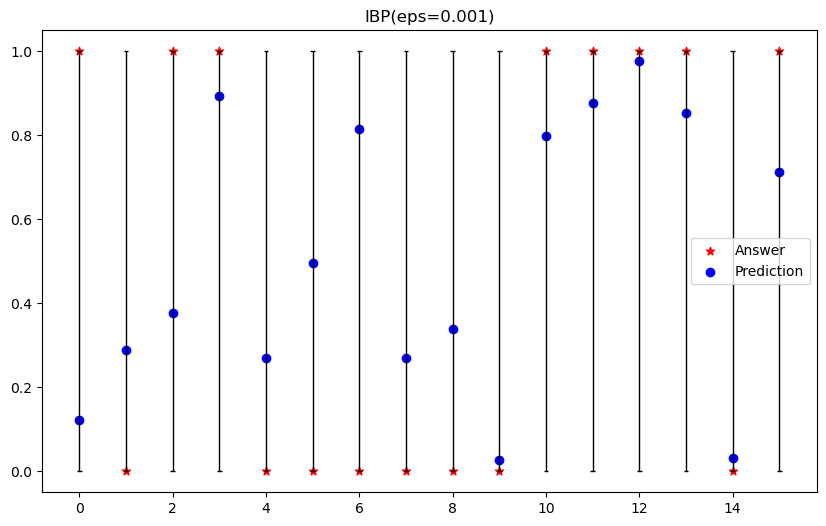


Bounding method: IBP+backward (CROWN-IBP)
0:   -0.168 <= f_0(x_0+eps) <=    1.005 (*)
1:   -0.105 <= f_1(x_0+eps) <=    1.050 
2:   -0.119 <= f_2(x_0+eps) <=    1.051 (*)
3:    0.011 <= f_3(x_0+eps) <=    1.205 (*)
4:   -0.125 <= f_4(x_0+eps) <=    1.034 
5:   -0.091 <= f_5(x_0+eps) <=    1.071 
6:   -0.019 <= f_6(x_0+eps) <=    1.143 
7:   -0.125 <= f_7(x_0+eps) <=    1.047 
8:   -0.103 <= f_8(x_0+eps) <=    1.049 
9:   -0.230 <= f_9(x_0+eps) <=    0.952 
10:   -0.023 <= f_10(x_0+eps) <=    1.141 (*)
11:    0.009 <= f_11(x_0+eps) <=    1.175 (*)
12:    0.099 <= f_12(x_0+eps) <=    1.350 (*)
13:   -0.020 <= f_13(x_0+eps) <=    1.171 (*)
14:   -0.216 <= f_14(x_0+eps) <=    0.955 
15:   -0.021 <= f_15(x_0+eps) <=    1.130 (*)


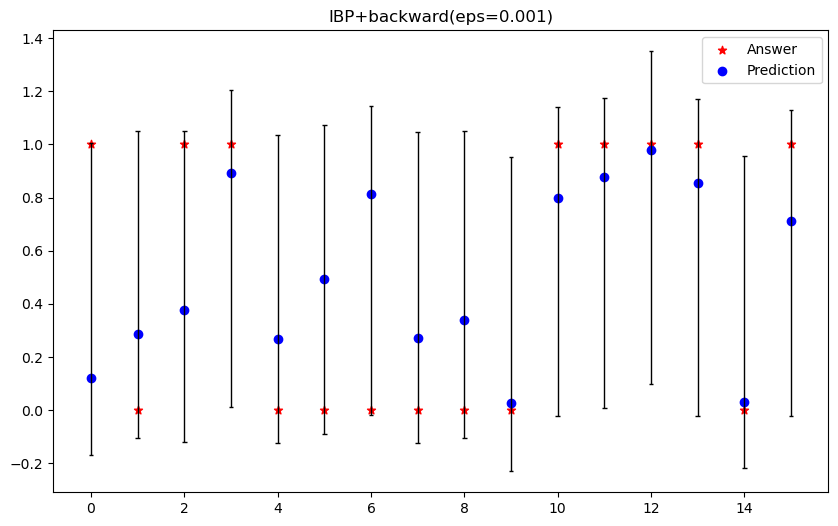


Bounding method: backward (CROWN)
0:    0.081 <= f_0(x_0+eps) <=    0.169 (*)
1:    0.217 <= f_1(x_0+eps) <=    0.374 
2:    0.297 <= f_2(x_0+eps) <=    0.466 (*)
3:    0.861 <= f_3(x_0+eps) <=    0.920 (*)
4:    0.187 <= f_4(x_0+eps) <=    0.357 
5:    0.399 <= f_5(x_0+eps) <=    0.585 
6:    0.766 <= f_6(x_0+eps) <=    0.860 
7:    0.202 <= f_7(x_0+eps) <=    0.360 
8:    0.263 <= f_8(x_0+eps) <=    0.421 
9:    0.018 <= f_9(x_0+eps) <=    0.041 
10:    0.735 <= f_10(x_0+eps) <=    0.847 (*)
11:    0.834 <= f_11(x_0+eps) <=    0.911 (*)
12:    0.972 <= f_12(x_0+eps) <=    0.982 (*)
13:    0.806 <= f_13(x_0+eps) <=    0.889 (*)
14:    0.020 <= f_14(x_0+eps) <=    0.046 
15:    0.646 <= f_15(x_0+eps) <=    0.779 (*)


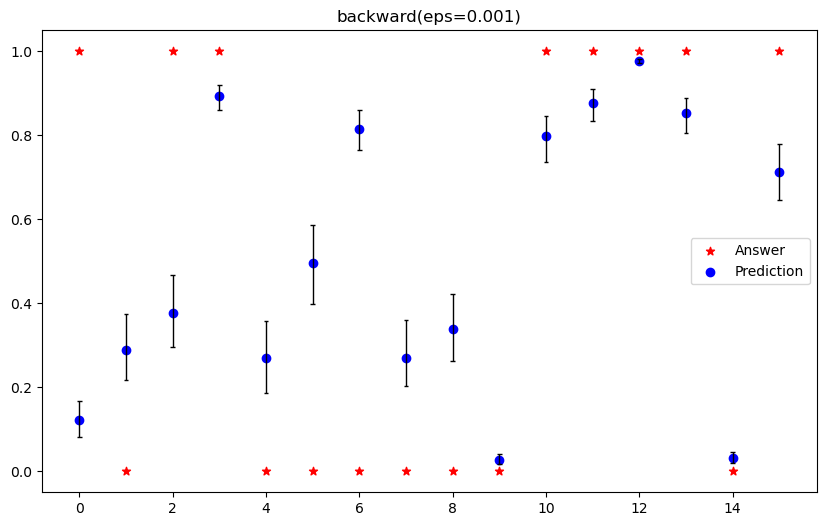

In [27]:
#
# Lirpa를 적용하고 그래프로 그 결과를 보여주는 프로그램
#

eps = 0.001
norm = float("inf")
ptb = PerturbationLpNorm(norm = norm, eps = eps)
test_X_1 = BoundedTensor(test_X_1, ptb)

pred = lirpa_model(test_X_1)
#label = torch.argmax(pred, dim=1).cpu().detach().numpy()

# print(test_X_1)
# print(test_Y_1)
print('Answer: ', test_Y_1)

print('Prediction: ', pred)


for method in [
    'IBP', 'IBP+backward (CROWN-IBP)', 'backward (CROWN)'   # ,
        # 'CROWN-Optimized (alpha-CROWN)'
    ]:
    print('Bounding method:', method)
    if 'Optimized' in method:
        lirpa_model.set_bound_opts({'optimize_bound_args': {'iteration': 20, 'lr_alpha': 0.1}})
    lb, ub = lirpa_model.compute_bounds(x=(test_X_1,), method=method.split()[0])

    for j in range(16):
        indicator = '(*)' if test_Y_1[0][j] >= 1.0 else ''
        print('{j}: {l:8.3f} <= f_{j}(x_0+eps) <= {u:8.3f} {ind}'.format(
                j=j, l=lb[0][j].item(), u=ub[0][j].item(), ind=indicator))

    xaxis = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

    plt.figure(figsize=(10,6))

    # answer와 prediction값 표시
    plt.scatter(xaxis, test_Y_1.tolist(), color='red', marker='*', label='Answer')
    plt.scatter(xaxis, pred.tolist(), color='blue', label='Prediction')
    
    # lb값과 up값 표시
    # plt.scatter(xaxis, lb[0].tolist(), color='red', marker='lb', label='Lower Bound')
    # plt.scatter(xaxis, ub[0].tolist(), color='green', marker='ub', label='Upper Bound')

    lb_list = lb[0].tolist()
    ub_list = ub[0].tolist()
    
    for j in range(16):
        plt.vlines(x=j, ymin=lb_list[j], ymax=ub_list[j], color='black', linewidth=1)
        plt.hlines(y=lb_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)
        plt.hlines(y=ub_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)

    # plt.xlabel('X-axis')
    # plt.ylabel('Y-axis')
    plt.title(method.split()[0] + "(eps=" + str(eps) + ")")
    plt.legend()
    # plt.grid(True)

    plt.show()

    print()

In [22]:
# 
# Lirpa가 분석한 lower bounds 16개와 upper bounds 16개에서 Top 8개를 선택하고, 
# 본디 뉴럴넷의 결과와 같으면 True, 다르면 False를 리턴하는 프로그램
#
# lower bounds로 정렬했을 때 8번째 원소의 lower bound가
# upper bounds로 정렬했을 때 9번째 원소의 upper bound보다 크면
# Top 8개를 찾는 알고리즘
#

def process_and_compare(lb_bounds, ub_bounds, answer_list_float, max_diff, verbose):
    # 상위 8개의 인덱스를 찾기 
    top_k_indices = np.argsort(answer_list_float)[-8:] 

    # 모든 값을 0으로 설정 
    answer_list = np.zeros_like(answer_list_float) 

    # 상위 8개의 인덱스에 해당하는 값만 1로 설정 
    answer_list[top_k_indices] = 1
    
    # intervals = [( adjust(lb_bounds[i]), adjust(ub_bounds[i]), i) for i in range(len(lb_bounds))]
    intervals = [( lb_bounds[i], ub_bounds[i], i) for i in range(len(lb_bounds))]

    # lower bound <= upper bound 검사 
    for i in range (len(lb_bounds)):
        if intervals[i][0] > intervals[i][1]:
            if verbose:
                print ("False: lower bound > upper bound", intervals[i][0], ">", intervals[i][1])
            return False

    # return True  # just to take a look at the problem of  lower bound <= upper bound!
    
    if verbose:
        print (intervals)
    
    sorted_intervals_with_lb = sorted (intervals, key=lambda x: x[0], reverse=True)
    sorted_intervals_with_ub = sorted (intervals, key=lambda x: x[1], reverse=True)

    if verbose:
        print(sorted_intervals_with_lb)
        print(sorted_intervals_with_ub)
    
        print (sorted_intervals_with_lb[8-1][0])
        print (sorted_intervals_with_ub[9-1][1])
    
    if sorted_intervals_with_lb[8-1][0] > sorted_intervals_with_ub[9-1][1]:
        result = [0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0]
        for i in range(8):
            result[ sorted_intervals_with_lb[i][2] ] = 1


        if verbose:
            print('answer:', answer_list)
            print('result:', result)

        if len(result) != len(answer_list):
            if verbose:
                print ("False: len(answer_list) != 16: ")
            return False  # 첫번째 return False

        same = 0
        for i in range(16):
            if answer_list[i] == result[i] and answer_list[i] == 1:
                same = same + 1

        if 8 > max_diff and same >= 8-max_diff:
            return True
        else:
            if verbose:
                print( "False: answer_list != result", "under", max_diff);
            return False

    else:
        if verbose:
            print ("False: 8th lower bound <= 9th upper bound")
        return False # 세번째 return False

    

In [23]:
# 
# 4만개 데이터와 Epsilon 리스트를 조합해서 Lirpa로 분석하는 프로그램
#

turnOnDrawingGraphs = False
turnOnShowingBounds = False
turnOnShowingPrediction = False
turnOnShowingAnswers = False

noOfData = no_totalValData
# noOfData = 5

N_PRINT = 10000

method = 'backward (CROWN)'
print('Bounding method:', method)

# eps = 0.0001
norm = float("inf")
# ptb = PerturbationLpNorm(norm = norm, eps = eps)

print('noOfData: ', noOfData)

epsList = [  0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1 ] # 0.0000001,
epsListInDetailAll = [ 0.000001, 0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0010, 0.01, 0.1, 1 ]
epsListInDetail = [ 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0010 ]
epsListInDetail0_001 = [ 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010 ]
epsList1 = [ 0.000001, 0.00001, 0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.1, 1 ]
epsList2 = [ 0.000001, 0.00001, 0.0001, 0.001, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.1, 1 ]
epsListPaper = [ 0.000001, 0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.1, 1 ]

epsListApp = [ 0.001 ]

percentList = []

for max_diff in [0]:
  print('max diff: ', max_diff)
    
  for eps in epsListApp: # [ 0.00000000000000000001, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1 ]: 
    print('eps: ', eps)
    
    ptb = PerturbationLpNorm(norm = norm, eps = eps)

    bounds_data = []

    nTrue = 0
    nFalse = 0
    nOthers = 0
    percent = 0

    certificationResult = []

    comp_result_list = []

    for i in range(0, noOfData):
      test_X_i = test_X[i:i+1].view(1,256)
      pred_i = all_preds_raw[i:i+1]

      test_X_i = BoundedTensor(test_X_i, ptb)
      # pred = lirpa_model(test_X_i)

    

      #if turnOnShowingAnswers:
      #    print('Answer: ', pred_i[0].tolist())

      # if turnOnShowingPrediction:
      #     print('Prediction: ', pred[0].tolist())

      lb, ub = lirpa_model.compute_bounds(x=(test_X_i,), method=method.split()[0])

      lb_list = lb[0].tolist()
      ub_list = ub[0].tolist()

      # for saving data to a csv file
      # bounds_data.append(lb_list)
      # bounds_data.append(ub_list)

      #if turnOnShowingBounds:
      #    for j in range(16):
      #        indicator = '(*)' if pred_i[0][j] >= 1.0 else ''
      #        print('{j}: {l:8.3f} <= f_{j}(x_0+eps) <= {u:8.3f} {ind}'.format(
      #                j=j, l=lb[0][j].item(), u=ub[0][j].item(), ind=indicator))

      ### Beginning of drawing graphs
      if turnOnDrawingGraphs: 
        xaxis = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    
        plt.figure(figsize=(10,6))
    
        # answer와 prediction값 표시
        plt.scatter(xaxis, pred_i.tolist(), color='red', marker='*', label='Answer')
        # plt.scatter(xaxis, pred.tolist(), color='blue', label='Prediction')
        
        # lb값과 up값 표시
        # plt.scatter(xaxis, lb[0].tolist(), color='red', marker='lb', label='Lower Bound')
        # plt.scatter(xaxis, ub[0].tolist(), color='green', marker='ub', label='Upper Bound')
    
        
        for j in range(16):
            plt.vlines(x=j, ymin=lb_list[j], ymax=ub_list[j], color='black', linewidth=1)
            plt.hlines(y=lb_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)
            plt.hlines(y=ub_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)
    
        # plt.xlabel('X-axis')
        # plt.ylabel('Y-axis')
        plt.title(method.split()[0] + "(eps=" + str(eps) + ")")
        plt.legend()
        # plt.grid(True)
    
        plt.show()
        print()

      ### Ending of drawing graphs
      # answer_bounded_list = process_bounds(lb_list, ub_list)
      # comp_result = compare_lists(pred_i[0].tolist(), answer_bounded_list, turnOnShowingAnswers)

              
      count = 8
      #for k in range(16):
      #  if round(pred_i[0][k]) == 1:
      #     count = count + 1

      if count != 8:
        nOthers = nOthers + 1
      else:
        comp_result = process_and_compare(lb_list, ub_list, pred_i[0].tolist(), max_diff, turnOnShowingAnswers)
        # comp_result_int = process_and_compare_int_ret(lb_list, ub_list, pred_i[0].tolist(), max_diff, turnOnShowingAnswers)

        # if comp_result_int == 0:
        #     comp_result = True
        # else:
        #     comp_result = False

        # if comp_result != comp_result_simple:
        #     print('comp_result: ', comp_result)
        #     print('comp_result_simple: ', comp_result_simple)
        #     print(pred_i[0].tolist())
        #     print(lb_list)
        #     print(ub_list)
        #     break

        if turnOnShowingAnswers:
          if comp_result==False:
              print('Input: ', i)
              print('Answer: ', pred_i[0].tolist())
              print('Comparison:', comp_result)
            
              for j in range(16):
                indicator = '(*)' if pred_i[0][j] >= 1.0 else ''
                print('{j}: {l:8.3f} <= f_{j}(x_0+eps) <= {u:8.3f} {ind}'.format(
                        j=j, l=lb[0][j].item(), u=ub[0][j].item(), ind=indicator))
            
          print()

        # if comp_result==False:
        #   print('Result: ', comp_result_int)
        #   print('Answer: ', pred_i[0].tolist())
        #   print('lb: ', lb_list)
        #   print('ub: ', ub_list)

        # comp_result_list.append(comp_result)
      
        if comp_result:
            nTrue = nTrue + 1
            certificationResult.append(1)
        else:
            nFalse = nFalse + 1
            certificationResult.append(0)

        percent = float(nTrue)/float(nTrue+nFalse)*100

      if (i+1) % N_PRINT == 0 and i != 0:
          print(str(i+1)+':', 'T='+str(nTrue), 'F='+str(nFalse), 'ratio=', str(percent), 'others=', nOthers, end=', ')

    ### Final results:
    print()
    # print('Final results: ', 'eps: '+str(eps), 'T='+str(nTrue), 'F='+str(nFalse), nFalse, 'ratio=', str(percent), 'others=', nOthers )

    with open('certificationResult.txt', 'w') as f:
        for bit in certificationResult:
            f.write(f'{bit}\n')

  # percentList.append(percent)

  ### Done for all epss    

# plt.bar(epsList, percentList)

# plt.title('EPS vs. Percent')
# plt.xlabel('eps')
# plt.ylabel('(%)')

# plt.show()

Bounding method: backward (CROWN)
noOfData:  40000
max diff:  0
eps:  0.001
10000: T=4616 F=5384 ratio= 46.160000000000004 others= 0, 20000: T=9080 F=10920 ratio= 45.4 others= 0, 30000: T=13641 F=16359 ratio= 45.47 others= 0, 40000: T=18128 F=21872 ratio= 45.32 others= 0, 


In [20]:
pip install onnx onnxruntime

Note: you may need to restart the kernel to use updated packages.


In [21]:
import onnx

In [23]:
dummy_input = torch.rand(1,256)
torch.onnx.export(wirelessModel, dummy_input, "model.onnx", input_names=["input"], output_names=["output"], dynamic_axes=None, opset_version=11)

In [24]:
onnxmodel = onnx.load("model.onnx")
print("Input name:", onnxmodel.graph.input[0].name)
print("Output name:", onnxmodel.graph.output[0].name)

Input name: input
Output name: output


In [25]:
pip install maraboupy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement maraboupy (from versions: none)
ERROR: No matching distribution found for maraboupy
